In [ ]:
import pandas as pd
import scikits.bootstrap as bootstraps
import numpy as np
from matplotlib import pyplot as plt
import proplot as pplot
import cmaps
import xarray as xr
from scipy.stats import linregress
from warnings import simplefilter
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=FutureWarning)

## plot scaling factors and attributable change in subregions

In [ ]:
scaling_factor_and_trends_2sig = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/scripts/attribution_Ribes/trends_scaling_factors_2signal_GPH.csv',index_col=0)
scaling_factor_and_trends_3sig = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/scripts/attribution_Ribes/trends_scaling_factors_3signal_GPH.csv',index_col=0)

scaling_factor_and_trends_3sig['trend'] = scaling_factor_and_trends_3sig['trend'] * 2
scaling_factor_and_trends_3sig['trend_min'] = scaling_factor_and_trends_3sig['trend_min'] * 2
scaling_factor_and_trends_3sig['trend_max'] = scaling_factor_and_trends_3sig['trend_max'] * 2

scaling_factor_and_trends_3sig_ribes = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/scripts/attribution_Ribes/trends_scaling_factors_Ribes_GPH.csv',index_col=0)
scaling_factor_and_trends_3sig_ribes['trend'] = scaling_factor_and_trends_3sig_ribes['trend'] * 2
scaling_factor_and_trends_3sig_ribes['trend_min'] = scaling_factor_and_trends_3sig_ribes['trend_min'] * 2
scaling_factor_and_trends_3sig_ribes['trend_max'] = scaling_factor_and_trends_3sig_ribes['trend_max'] * 2

## FigS13

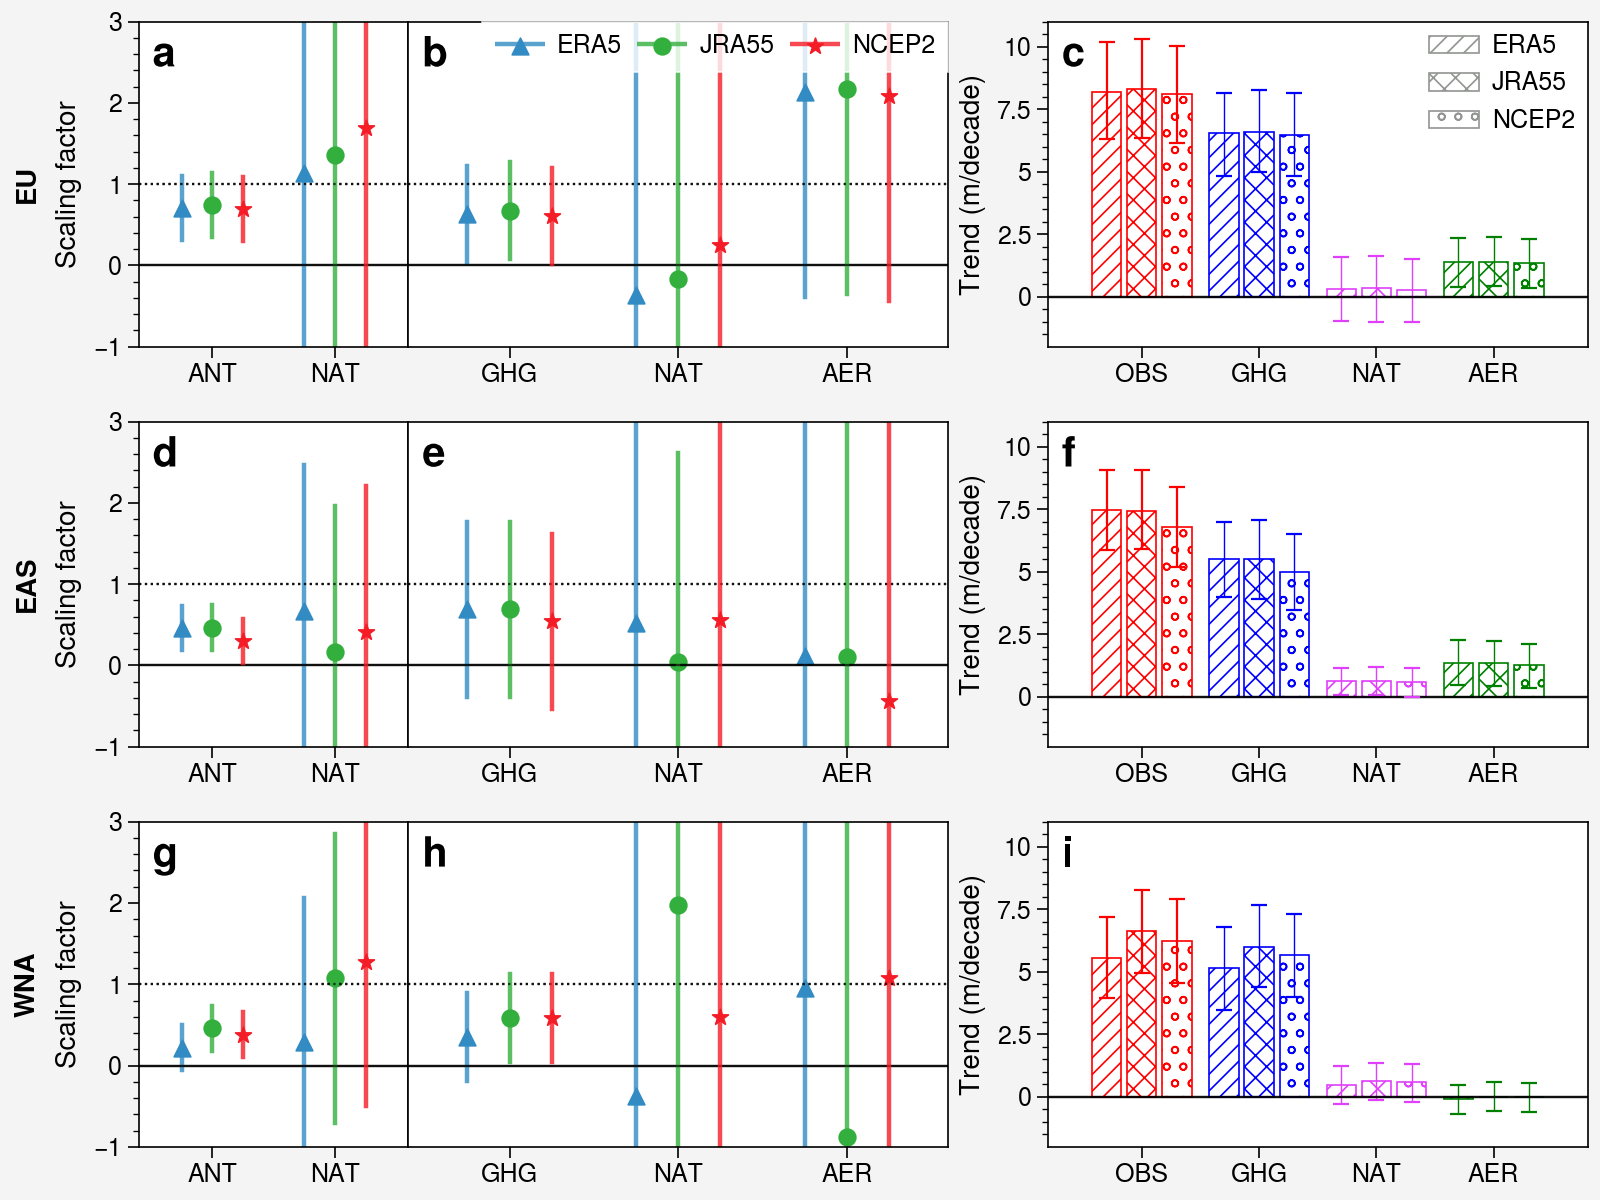

In [ ]:
array = [[1,2,2,3,3],[4,5,5,6,6],[7,8,8,9,9]]
region = ['EU','EAS','WNA']
bar_data_color = ['#2962FF','#FF3D00']
fig, ax = pplot.subplots(array,width=8,height=6,sharex=False,sharey=False,wspace=(0,0,4,0),hspace=(3))
ax.grid(False)

domain = region[0]
color_re = ['#328cc3','#33af3d','#f41c26']
marker_re = ['^','o','*']
jitters = {'era5':-0.3,'jra55':0,'ncep2':0.3}
hatchs = {'era5':'////','jra55':'xxx','ncep2':'oo'}
#

for d in range(len(region)):
    domain = region[d]
    for obs in ['era5','jra55','ncep2']:
        if obs == 'era5':
            jitter = -0.25
            color = color_re[0]
            marker = marker_re[0]
        elif obs == 'jra55':
            jitter = 0
            color = color_re[1]
            marker = marker_re[1]
        else:
            jitter = 0.25
            color = color_re[2]
            marker = marker_re[2]

        sf_df = scaling_factor_and_trends_2sig[scaling_factor_and_trends_2sig['obs_name']==obs]
        sf_df = sf_df[sf_df['domain']==domain]
        
        ax[d * 3].axhline(y=0,color='black',alpha=0.6,linewidth=0.8)
        ax[d * 3].axhline(y=1,linestyle=':',color='black',alpha=0.6,linewidth=0.8)
        l1 = ax[d * 3].plot((1+jitter,1+jitter),(sf_df['sf_min'][sf_df['forcing']=='ANT'],sf_df['sf_max'][sf_df['forcing']=='ANT']),color=color,alpha=0.8,linewidth=1.6)
        ax[d * 3].plot((2+jitter,2+jitter),(sf_df['sf_min'][sf_df['forcing']=='NAT'],sf_df['sf_max'][sf_df['forcing']=='NAT']),color=color,alpha=0.8,linewidth=1.6)
        s1 = ax[d * 3].scatter(x=1+jitter,y=sf_df['sf_best'][sf_df['forcing']=='ANT'],marker=marker,color=color)
        ax[d * 3].scatter(x=2+jitter,y=sf_df['sf_best'][sf_df['forcing']=='NAT'],marker=marker,color=color)
        ax[d * 3].set(ylim=(-1,3))
        ax[d * 3].set(xlim=(0.4,2.6))
        labels = ['','ANT','NAT','']
        ax[d * 3].set_xticklabels(labels)
        ax[d * 3].xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
        # ax[d * 3].minorticks_off()
        ax[d * 3].set_ylabel('Scaling factor',fontdict={'fontsize':10})

        ax[d * 3 + 1].axhline(y=0,color='black',alpha=0.6,linewidth=0.8)
        ax[d * 3 + 1].axhline(y=1,linestyle=':',color='black',alpha=0.6,linewidth=0.8)

        sf_df2 = scaling_factor_and_trends_3sig[scaling_factor_and_trends_3sig['obs_name']==obs]
        sf_df2 = sf_df2[sf_df2['domain']==domain]
        ax[d * 3 + 1].plot((2+jitter,2+jitter),(sf_df2['sf_min'][sf_df2['forcing']=='GHG'],sf_df2['sf_max'][sf_df2['forcing']=='GHG']),color=color,alpha=0.8,linewidth=1.6)
        ax[d * 3 + 1].plot((3+jitter,3+jitter),(sf_df2['sf_min'][sf_df2['forcing']=='NAT'],sf_df2['sf_max'][sf_df2['forcing']=='NAT']),color=color,alpha=0.8,linewidth=1.6)
        ax[d * 3 + 1].plot((4+jitter,4+jitter),(sf_df2['sf_min'][sf_df2['forcing']=='AER'],sf_df2['sf_max'][sf_df2['forcing']=='AER']),color=color,alpha=0.8,linewidth=1.6)
        ax[d * 3 + 1].scatter(x=2+jitter,y=sf_df2['sf_best'][sf_df2['forcing']=='GHG'],marker=marker,color=color)
        ax[d * 3 + 1].scatter(x=3+jitter,y=sf_df2['sf_best'][sf_df2['forcing']=='NAT'],marker=marker,color=color)
        ax[d * 3 + 1].scatter(x=4+jitter,y=sf_df2['sf_best'][sf_df2['forcing']=='AER'],marker=marker,color=color)
        ax[d * 3 + 1].set(ylim=(-1,3))
        ax[d * 3 + 1].set(xlim=(1.4,4.6))
        ax[d * 3 + 1].set_xticks([2,3,4])
        labels = ['GHG','NAT','AER']
        ax[d * 3 + 1].set_xticklabels(labels)
        ax[d * 3 + 1].xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
        ax[d * 3 + 1].yaxis.label.set_visible(False) # set ylabel invisible
        ax[d * 3 + 1].yaxis.set_visible(False) # turn off xaxis tick labels

        ################# Ribes ######################
        jitter = jitters[obs]

        sf_df2 = scaling_factor_and_trends_3sig_ribes[scaling_factor_and_trends_3sig['obs_name']==obs]
        sf_df2 = sf_df2[sf_df2['domain']==domain]
        
        err1_obs = sf_df2['trend'][sf_df2['forcing']=='Observation']-sf_df2['trend_min'][sf_df2['forcing']=='Observation']
        err2_obs = sf_df2['trend_max'][sf_df2['forcing']=='Observation']-sf_df2['trend'][sf_df2['forcing']=='Observation']
        err1_ghg = sf_df2['trend'][sf_df2['forcing']=='Forcing no 1 only']-sf_df2['trend_min'][sf_df2['forcing']=='Forcing no 1 only']
        err2_ghg = sf_df2['trend_max'][sf_df2['forcing']=='Forcing no 1 only']-sf_df2['trend'][sf_df2['forcing']=='Forcing no 1 only']
        err1_nat = sf_df2['trend'][sf_df2['forcing']=='Forcing no 2 only']-sf_df2['trend_min'][sf_df2['forcing']=='Forcing no 2 only']
        err2_nat = sf_df2['trend_max'][sf_df2['forcing']=='Forcing no 2 only']-sf_df2['trend'][sf_df2['forcing']=='Forcing no 2 only']
        err1_aer = sf_df2['trend'][sf_df2['forcing']=='Forcing no 3 only']-sf_df2['trend_min'][sf_df2['forcing']=='Forcing no 3 only']
        err2_aer = sf_df2['trend_max'][sf_df2['forcing']=='Forcing no 3 only']-sf_df2['trend'][sf_df2['forcing']=='Forcing no 3 only']
        
        ax[d,3].axhline(y=0,color='black',alpha=0.6,linewidth=0.8)
        p1 = ax[d,3].bar(1+jitter,sf_df2['trend'][sf_df2['forcing']=='Observation'],yerr=[[err1_obs.values[0]],[err2_obs.values[0]]],align='center',edgecolor=color_f[0],fill=False,hatch=hatchs[obs],width=0.5,error_kw=dict(lw=0.8, capsize=3, capthick=0.8,ecolor=color_f[0]))
        p2 = ax[d,3].bar(2+jitter,sf_df2['trend'][sf_df2['forcing']=='Forcing no 1 only'],yerr=[[err1_ghg.values[0]],[err2_ghg.values[0]]],align='center',edgecolor=color_f[1],fill=False,width=0.5,hatch=hatchs[obs],error_kw=dict(lw=0.5, capsize=3, capthick=0.8,ecolor=color_f[1]))
        p3 = ax[d,3].bar(3+jitter,sf_df2['trend'][sf_df2['forcing']=='Forcing no 2 only'],yerr=[[err1_nat.values[0]],[err2_nat.values[0]]],align='center',edgecolor=color_f[2],fill=False,width=0.5,hatch=hatchs[obs],error_kw=dict(lw=0.5, capsize=3, capthick=0.8,ecolor=color_f[2]))
        p4 = ax[d,3].bar(4+jitter,sf_df2['trend'][sf_df2['forcing']=='Forcing no 3 only'],yerr=[[err1_aer.values[0]],[err2_aer.values[0]]],align='center',edgecolor=color_f[3],fill=False,width=0.5,hatch=hatchs[obs],error_kw=dict(lw=0.5, capsize=3, capthick=0.8,ecolor=color_f[3]))
        ax[d,3].set(ylim=(-2,11))
        ax[d,3].set(xlim=(0.2,4.8))
        labels = ['','OBS','GHG','NAT','AER','']
        ax[d,3].set_xticklabels(labels)
        ax[d,3].xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
        ax[d,3].set_ylabel('Trend (m/decade)',fontdict={'fontsize':10})
        ax[d,3].grid(False)

        if obs == 'era5':
            l1_era5 = l1
            s1_era5 = s1
            p1_era5 = p1
        elif obs == 'jra55':
            l1_jra55 = l1
            s1_jra55 = s1
            p1_jra55 = p1
        else:
            l1_ncep2 = l1
            s1_ncep2 = s1
            p1_ncep2 = p1
            
legend = ax[1].legend(
    [(s1_era5,l1_era5[0]),(s1_jra55,l1_jra55[0]),(s1_ncep2,l1_ncep2[0])], ['ERA5','JRA55','NCEP2'],ncol=3,fontsize=10,frameon=True,loc='ur',columnspacing=0.6,framealpha=0.8)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
ax.format(
    abc = 'a', abcloc='ul', abcsize=15, leftlabels = ('EU','EAS','WNA'))

circ1 = mpatches.Patch(edgecolor='grey',fill=False,hatch='////',label='ERA5')
circ2= mpatches.Patch(edgecolor='grey',fill=False,hatch='xxx',label='JRA55')
circ3 = mpatches.Patch(edgecolor='grey',fill=False,hatch='o0o',label='NCEP2')
ax[0,3].legend(handles=[circ1,circ2,circ3],frameon=False,ncol=1,fontsize = 'medium', fancybox = True, loc='upper right') #bbox_to_anchor=[1.01,0.7],

fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/HWdna_figure_res/'
fig.save(fig_dir + 'FigS13_detection_and_attribution_for_reanalysis_using_ROF_Ribes.pdf')